# Importamos librerías

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk

# Definimos ruta y leemos dataset

In [3]:
ruta_output = '../data/titanic.csv'

titanic = pd.read_csv(ruta_output, sep = ';')

In [4]:
seed = 1234

# Verificación de datos

In [5]:
print(titanic.shape)

(887, 8)


In [6]:
titanic.head()

,Name,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived
0,Mr. Owen Harris Braund,3,male,22.0,1,0,7.2500,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,female,38.0,1,0,71.2833,1
2,Miss. Laina Heikkinen,3,female,26.0,0,0,7.9250,1
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,female,35.0,1,0,53.1000,1
4,Mr. William Henry Allen,3,male,35.0,0,0,8.0500,0


# Separamos en train y test

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic, test_size=0.30, random_state=seed)

In [8]:
train_x, train_y = train[['Fare']], train['Survived']
test_x, test_y = test[['Fare']], test['Survived']

# train[['Fare']] asegura que train_x tenga dos dimensiones, con forma (n_samples, 1), y es aceptado por fit(). 
# n_samples = nº de filas, 1 = una columna ('Fare')
# train['Fare'] (sin los dobles corchetes) genera una Serie de una sola dimensión, lo que causa el error.

# Creamos el modelo y vemos su scoring

In [9]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x, train_y)

DecisionTreeClassifier()

In [10]:
print(dec_tree.score(test_x, test_y))

0.6816479400749064


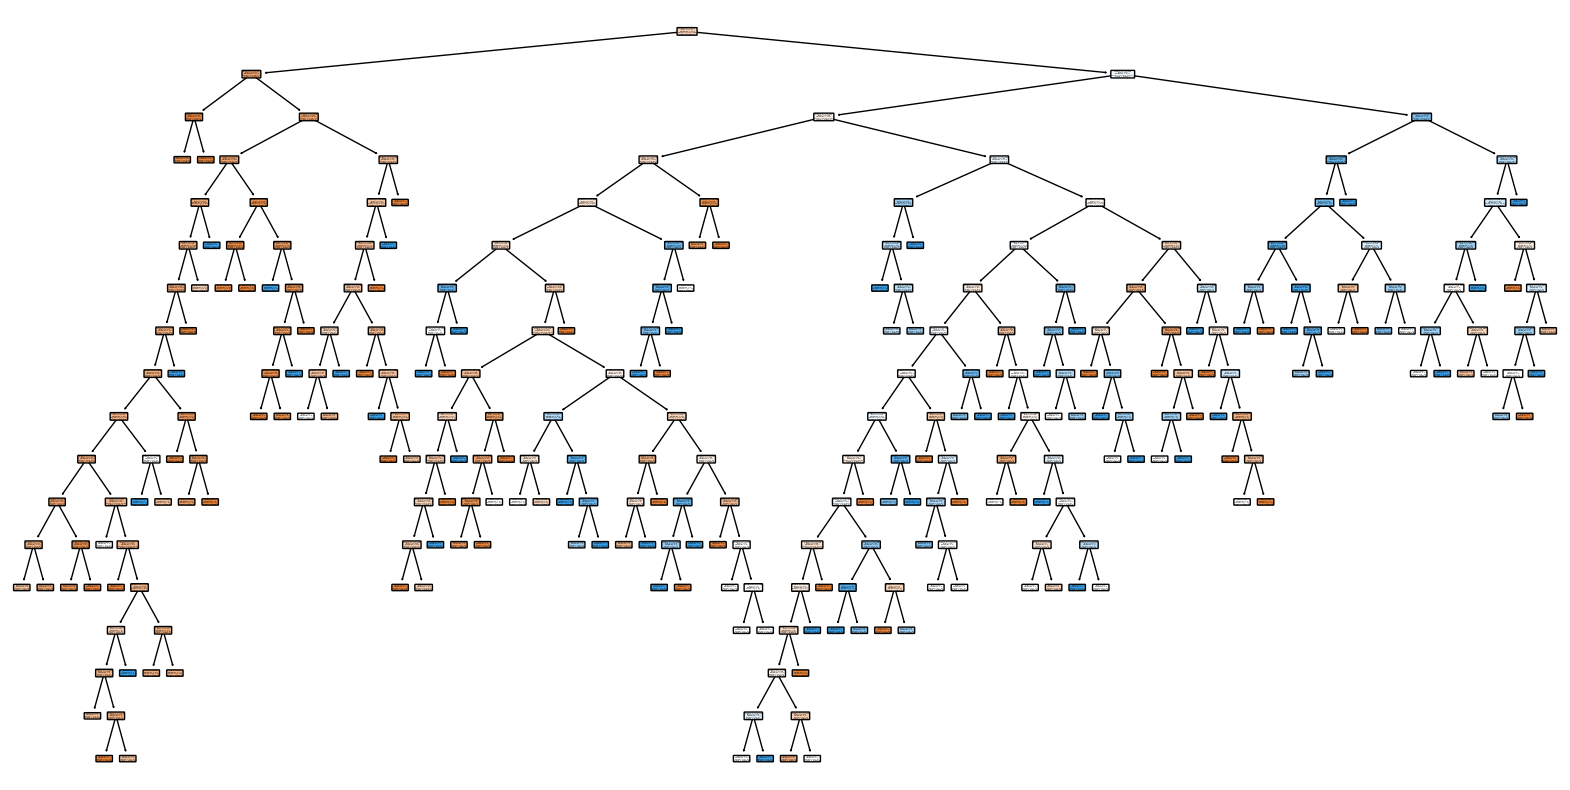

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Tamaño de la figura

# Visualización del árbol de decisión
plot_tree(
    dec_tree, 
    filled=True,        # Colores para diferenciar las clases
    feature_names=titanic.columns,  # Nombres de las características (columnas del dataframe)
    class_names=["Clase 0", "Clase 1"],  # Etiquetas de las clases
    rounded=True,       # Bordes redondeados para un mejor estilo
)

plt.show()